# Website Phishing Data Prediction - classification - logistic Regression - sklearn 

------The phishing problem is considered a vital issue in industry especially e-banking and e-commerce taking the number of    online transactions involving payments. 

------Identified different features related to legitimate and phishy websites and collected 1353 different websites from difference sources.

------548 legitimate URLs +  702 phishing URLs + 103 suspicious URLs = 1353 websites.

-------When a website is considered SUSPICIOUS that means it can be either phishy or legitimate, meaning the website held some legit and phishy features.

In [73]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [74]:
websitetrain = pd.read_csv(r"D:\Users\dasarred\Desktop\WebsitePhishingData\WebsitePhishingData.csv",names =  ["SFH","popUpWidnow","SSLfinal_State","Request_URL","URL_of_Anchor","web_traffic","URL_Length","age_of_domain","having_IP_Address","Result"],sep = ',')

In [75]:
type(websitetrain)

pandas.core.frame.DataFrame

In [76]:
websitetrain.shape

(1353, 10)

In [77]:
websitetrain.head(10)

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
5,-1,-1,1,-1,-1,1,0,-1,0,1
6,1,-1,0,1,-1,0,0,1,0,-1
7,1,0,1,1,0,0,0,1,1,-1
8,-1,-1,0,-1,-1,-1,-1,1,0,0
9,-1,0,-1,-1,1,1,0,-1,0,1


In [78]:
websitetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
SFH                  1353 non-null int64
popUpWidnow          1353 non-null int64
SSLfinal_State       1353 non-null int64
Request_URL          1353 non-null int64
URL_of_Anchor        1353 non-null int64
web_traffic          1353 non-null int64
URL_Length           1353 non-null int64
age_of_domain        1353 non-null int64
having_IP_Address    1353 non-null int64
Result               1353 non-null int64
dtypes: int64(10)
memory usage: 105.8 KB


In [79]:
websitetraincorr = websitetrain.corr()

In [80]:
websitetraincorr

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
SFH,1.000000,0.375943,0.368690,0.257247,0.333703,-0.187082,0.151503,0.163182,0.043349,-0.678277
popUpWidnow,0.375943,1.000000,0.218050,0.111520,0.167760,-0.140407,0.136229,0.076815,0.123399,-0.509749
SSLfinal_State,0.368690,0.218050,1.000000,0.057239,0.088525,-0.171719,0.095055,0.208091,0.108000,-0.518762
Request_URL,0.257247,0.111520,0.057239,1.000000,0.337277,-0.045858,0.048431,0.053348,0.013346,-0.271609
URL_of_Anchor,0.333703,0.167760,0.088525,0.337277,1.000000,-0.092045,0.097581,0.069178,0.039412,-0.287007
web_traffic,-0.187082,-0.140407,-0.171719,-0.045858,-0.092045,1.000000,-0.108204,-0.683857,-0.094957,0.243896
URL_Length,0.151503,0.136229,0.095055,0.048431,0.097581,-0.108204,1.000000,0.075338,0.165152,-0.183061
age_of_domain,0.163182,0.076815,0.208091,0.053348,0.069178,-0.683857,0.075338,1.000000,0.040379,-0.231931
having_IP_Address,0.043349,0.123399,0.108000,0.013346,0.039412,-0.094957,0.165152,0.040379,1.000000,-0.059225
Result,-0.678277,-0.509749,-0.518762,-0.271609,-0.287007,0.243896,-0.183061,-0.231931,-0.059225,1.000000


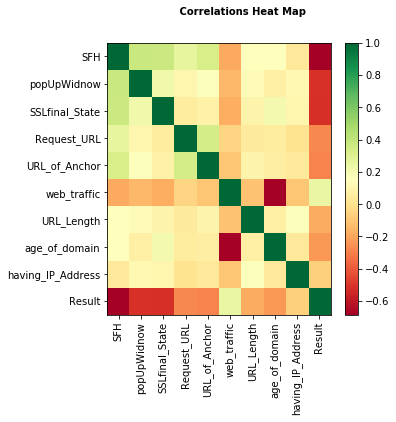

In [81]:
plt.figure(figsize=(5, 5))
plt.imshow(websitetraincorr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(websitetraincorr)), websitetraincorr.columns, rotation='vertical')
plt.yticks(range(len(websitetraincorr)), websitetraincorr.columns);
plt.suptitle(' Correlations Heat Map ', fontsize=10, fontweight='bold')
plt.show()

In [82]:
websitetraincorr['Result']

SFH                 -0.678277
popUpWidnow         -0.509749
SSLfinal_State      -0.518762
Request_URL         -0.271609
URL_of_Anchor       -0.287007
web_traffic          0.243896
URL_Length          -0.183061
age_of_domain       -0.231931
having_IP_Address   -0.059225
Result               1.000000
Name: Result, dtype: float64

In [83]:
np.abs(websitetraincorr['Result']).sort_values(ascending=False)

Result               1.000000
SFH                  0.678277
SSLfinal_State       0.518762
popUpWidnow          0.509749
URL_of_Anchor        0.287007
Request_URL          0.271609
web_traffic          0.243896
age_of_domain        0.231931
URL_Length           0.183061
having_IP_Address    0.059225
Name: Result, dtype: float64

In [84]:
imp_columns = ['SFH','SSLfinal_State','popUpWidnow','URL_of_Anchor','Request_URL','web_traffic','age_of_domain','URL_Length']

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [86]:
inputData=websitetrain.iloc[:,:9]

In [87]:
inputData.shape

(1353, 9)

In [88]:
inputData.columns

Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address'],
      dtype='object')

In [89]:
outputData=websitetrain.iloc[:,9]

In [90]:
outputData.shape

(1353,)

In [91]:
logistic=LogisticRegression()

In [92]:
logistic.fit(inputData,outputData)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
logistic.score(inputData,outputData)

0.83592017738359203

In [94]:
confusion_matrix(logistic.predict(inputData),outputData)

array([[642,  51,  58],
       [  1,   1,   2],
       [ 59,  51, 488]])

In [95]:
from sklearn.metrics import classification_report

In [107]:
ClassificationReport1 = classification_report(logistic.predict(inputData),outputData)

In [109]:
print(ClassificationReport1)

             precision    recall  f1-score   support

         -1       0.91      0.85      0.88       751
          0       0.01      0.25      0.02         4
          1       0.89      0.82      0.85       598

avg / total       0.90      0.84      0.87      1353



In [110]:
IMPinputData=websitetrain.iloc[:,[0,1,2,3,4,5,6,7] ]

In [111]:
IMPinputData.shape

(1353, 8)

In [112]:
IMPinputData.columns

Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain'],
      dtype='object')

In [113]:
logisticIMPcolumns =LogisticRegression()

In [114]:
logisticIMPcolumns.fit(IMPinputData,outputData)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
logisticIMPcolumns.score(IMPinputData,outputData)

0.83222468588322251

In [115]:
confusion_matrix(logisticIMPcolumns.predict(IMPinputData),outputData)

array([[642,  51,  61],
       [  1,   1,   4],
       [ 59,  51, 483]])

In [117]:
ClassificationReport2 = classification_report(logisticIMPcolumns.predict(IMPinputData),outputData)

In [118]:
print(ClassificationReport2)

             precision    recall  f1-score   support

         -1       0.91      0.85      0.88       754
          0       0.01      0.17      0.02         6
          1       0.88      0.81      0.85       593

avg / total       0.90      0.83      0.86      1353

